Single-cell transcriptome analysis in mouse skin tissue reveals that the highly expressed genes are related to inhibitor and regulator which mostly lie in keratinocyte stem and epidermal cells.

In [12]:
#Upgrading system
pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


In [13]:
#Installing black theme for Jupyter Notebook
pip install jupyter-black jupyter

   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ------------------------------- -------- 1.8/2.3 MB 9.1 MB/s eta 0:00:01
   ---------------------------------------- 2.3/2.3 MB 7.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [15]:
#Importing black option
import jupyter_black

In [16]:
#Loading the module jupyter_black
jupyter_black.load()

In [17]:
#Configuration
??jupyter_black.load

Signature:
jupyter_black.load(
    ip: Optional[IPython.terminal.interactiveshell.TerminalInteractiveShell] = None,
    lab: bool = True,
    line_length: Optional[int] = None,
    target_version: Optional[black.mode.TargetVersion] = None,
    verbosity: Union[int, str] = 20,
    **black_config: Any,
) -> None
Source:   
def load(
    ip: t.Optional[Ipt] = None,
    lab: bool = True,
    line_length: t.Optional[int] = None,
    target_version: t.Optional[black.TargetVersion] = None,
    verbosity: t.Union[int, str] = logging.INFO,
    **black_config: t.Any,
) -> None:
    """Load the extension via `jupyter_black.load`.

    This allows passing in custom configuration.

    Arguments:
        ip: iPython interpreter -- you should be able to ignore this
        lab: Whether this is a jupyterlab session
        line_length: preferred line length
        target_version: preferred python version
        verbosity: logging verbosity
        **black_config: Other arguments you want to pass to

For a long time, moue has been used in research for it’s around 80% similarity to humans which has been yielded to various successful inventions to treat human disease.This research aims to investigate mouse skin tissue using transcriptomics data from individual cells to know the differences between cells in depth using single cell data.Single cell data which has gained popularity since 2014 helps to identify cell specific changes and yield more accurate information than bulk-cell RNA seq data[1].


Single cell data for mice has been taken from Tabula Muris, a popular project , which combined around 100,00 cells information for around 20 organs and tissue.In this research, the skin tissue has been considered which has been sequenced using SMART-Seq2 method, a FACS based method. 
Two files regarding the data have been taken from the Tabula Muris website and they are counts of individual cells per gene and associated metadata(such as plate barcode, mouse sex and id).After manually downloading the data, the counts of individual cells per gene dataset has been transposed to make an expression matrix where each column and row refers to the gene and single cell respectively.For the convenience and simplicity of research only 553 cells have been considered[2].

The workflow here has been created through follwing the tutorial from single analysis worksop offered by the Chan Zuckerberg Initiative by using scanpy python libarary[3].




The steps for the single cell data analysis are as follows:
1.Creation of AnnData object
2.Quality Control of cell and gene
3.Principal Component Analysis before and after Normalization
4.Embedding using  tSNE(t-Distributed Stochastic Neighbour Embedding)  and UMAP (Uniform Approximation and Projection)
5.Clustering using K-means and graph based 
6.Differential gene expression


Step 01- Creation of AnnData Object

In [11]:
# Reading dataframe of skin counts of 553 cells
import pandas as pd
count_dataframe = pd.read_csv('skincounts554.csv', # where to find the data
                              index_col=0) # use the first column to label the rows (the 'index')

## print the first 9 rows of our dataframe
print(count_dataframe.head(9)) 

                          0610005C13Rik  0610007C21Rik  0610007L01Rik  \
A12.MAA000427.3_11_M.1.1              0            246              0   
J12.MAA000427.3_11_M.1.1              0            111              0   
K14.MAA000427.3_11_M.1.1              0            279              0   
L16.MAA000427.3_11_M.1.1              0              0              0   
M18.MAA000427.3_11_M.1.1              0             92              5   
N20.MAA000427.3_11_M.1.1              1              0              0   
O22.MAA000427.3_11_M.1.1              0            264              0   
A13.MAA000427.3_11_M.1.1              0            155              0   
B16.MAA000427.3_11_M.1.1              0              0              0   

                          0610007N19Rik  0610007P08Rik  0610007P14Rik  \
A12.MAA000427.3_11_M.1.1              0              0              0   
J12.MAA000427.3_11_M.1.1              0              0              0   
K14.MAA000427.3_11_M.1.1              0           

In [12]:
# Reading dataframe of metadata information of 553 cells
import pandas as pd
meta_dataframe = pd.read_csv('metadata554.csv', # where to find the data
                              index_col=0) # use the first column to label the rows (the 'index')

## print the first 9 rows of our dataframe
print(meta_dataframe.head(9)) 

                              cell_ontology_class subtissue mouse.sex  \
cell                                                                    
A12.MAA000427.3_11_M.1.1   keratinocyte stem cell    Anagen         M   
J12.MAA000427.3_11_M.1.1   keratinocyte stem cell    Anagen         M   
K14.MAA000427.3_11_M.1.1   keratinocyte stem cell    Anagen         M   
L16.MAA000427.3_11_M.1.1   keratinocyte stem cell    Anagen         M   
M18.MAA000427.3_11_M.1.1   keratinocyte stem cell    Anagen         M   
N20.MAA000427.3_11_M.1.1   keratinocyte stem cell    Anagen         M   
O22.MAA000427.3_11_M.1.1   keratinocyte stem cell    Anagen         M   
A13.MAA000427.3_11_M.1.1   keratinocyte stem cell    Anagen         M   
B16.MAA000427.3_11_M.1.1  basal cell of epidermis    Anagen         M   

                         mouse.id plate.barcode  
cell                                             
A12.MAA000427.3_11_M.1.1   3_11_M     MAA000427  
J12.MAA000427.3_11_M.1.1   3_11_M     MAA00042

In [13]:
pip install scanpy

Note: you may need to restart the kernel to use updated packages.


In [14]:
import scanpy as sc # importing the scanpy library that tells Python how an AnnData data structure works

In [15]:
# Printing the shape of datframe for skin counts. It tells the number of row and column and the number of row has to march with numer of row if meta_dataframe.
print(count_dataframe.shape)

(553, 2005)


In [16]:
# Printing the shape of meta_dataframe
print(meta_dataframe.shape)

(553, 5)


In [17]:
# AnnData object has been created where obs and vars are the number of cells and genes respectivley. It could be seeb that there are duplicates which have kept since FACS based method can contain duplicates.
adata = sc.AnnData(X = count_dataframe, obs = meta_dataframe)
print(adata)

AnnData object with n_obs × n_vars = 553 × 2005
    obs: 'cell_ontology_class', 'subtissue', 'mouse.sex', 'mouse.id', 'plate.barcode'


C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\anndata\_core\anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [18]:
# Before the quality control step the spike0ins need to be labelled since this is a smartseq2 data.It could be seen from the analysis that there is no spike-ins data.
is_spike_in = {}
number_of_spike_ins = 0

for gene_name in adata.var_names:
    if 'ERCC' in gene_name:
        is_spike_in[gene_name] = True # record that we found a spike-in
        number_of_spike_ins += 1 # bump the counter
    else:
        is_spike_in[gene_name] = False # record that this was not a spike-in
        
adata.var['ERCC'] = pd.Series(is_spike_in) # because the index of adata.var and the keys of is_spike_in match, anndata will take care of matching them up
print('found this many spike ins: ', number_of_spike_ins)

found this many spike ins:  0


In [19]:
# Saving the file to use the raw data
adata.write('skin_raw.h5ad') ## the h5ad extension is AnnData-specific

STEP 03- Quality Control

It is important to consider only the cells which have passed the quality control stage since poor quality cells can add technical noise.There are various quality control or QC measures and here the measures are the library size and detection of unique genes.


In [20]:
import scanpy as sc # import scanpy to handle the AnnData 
import pandas as pd # import pandas to handle dataframes
import matplotlib.pyplot as plt # import matplotlib to visualize the qc metrics

# magic incantation to help matplotlib work with jupyter notebook
%matplotlib inline 

In [21]:
adata = sc.read('skin_raw.h5ad')#Reading the data

C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\anndata\_core\anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


For cell quality dataframe, the parameters are the n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts, total_counts_ERCC,log1p_total_counts_ERCC,pct_counts_ERCC as well as the pct_counts in the top 50,100,200 and 500 genes. For the gene quality dataframe, the parameters are the n_cells_by_counts ,mean_count,log1p_mean_count,pct_dropout_by_counts,total_counts and log1p_total_counts. 



In [22]:
# Two kinds of dataframe have been created which are the cell and gene quality control dataframe.
 
qc = sc.pp.calculate_qc_metrics(adata, qc_vars = ['ERCC'])# this returns a tuple of (cell_qc_dataframe, gene_qc_dataframe)
                                 # ask for the percentage of reads from spike ins
                                
cell_qc_dataframe = qc[0]
gene_qc_dataframe = qc[1]

print('This is the cell quality control dataframe:')
print(cell_qc_dataframe.head(2))

print('\n\n\n\nThis is the gene quality control dataframe:')
print(gene_qc_dataframe.head(2))

This is the cell quality control dataframe:
                          n_genes_by_counts  log1p_n_genes_by_counts  \
cell                                                                   
A12.MAA000427.3_11_M.1.1                117                 4.770685   
J12.MAA000427.3_11_M.1.1                 75                 4.330733   

                          total_counts  log1p_total_counts  \
cell                                                         
A12.MAA000427.3_11_M.1.1         15301            9.635739   
J12.MAA000427.3_11_M.1.1          9580            9.167537   

                          pct_counts_in_top_50_genes  \
cell                                                   
A12.MAA000427.3_11_M.1.1                   86.517221   
J12.MAA000427.3_11_M.1.1                   98.538622   

                          pct_counts_in_top_100_genes  \
cell                                                    
A12.MAA000427.3_11_M.1.1                     99.75165   
J12.MAA000427.3_11_M.1

Quality control for cells by cheing the libary size(total_counts) and detected genes(n_genes_by_count).

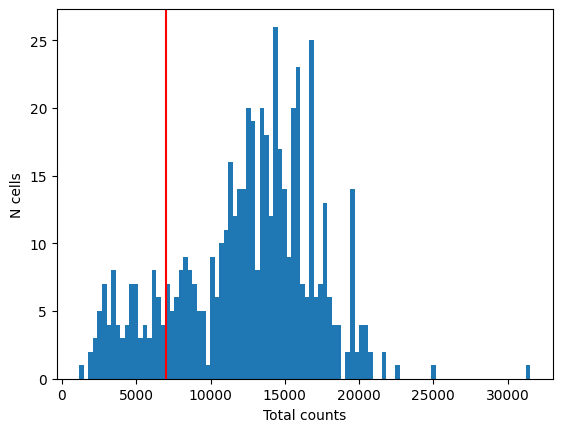

In [23]:
plt.hist(cell_qc_dataframe['total_counts'], bins=100)
plt.xlabel('Total counts')
plt.ylabel('N cells')
plt.axvline(7000, color='red')


From the upper graph it can be said that most of the library size are between 10000 to around 18000.

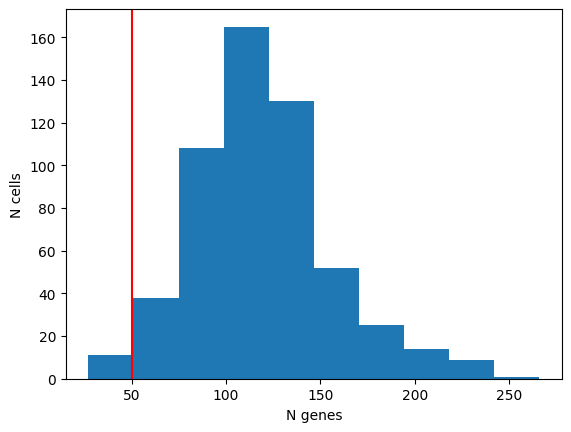

In [24]:
#Checking the total number of unique genes
plt.hist(cell_qc_dataframe['n_genes_by_counts'], bins=10)
plt.xlabel('N genes')
plt.ylabel('N cells')
plt.axvline(50, color='red')

It can be seen that the number of uniques genes are between 100 to 150. 

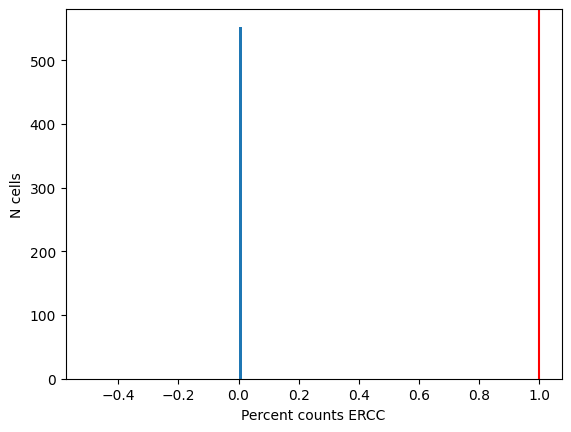

In [25]:
# To check ERCC 
plt.hist(cell_qc_dataframe['pct_counts_ERCC'], bins=100)
plt.xlabel('Percent counts ERCC')
plt.ylabel('N cells')
plt.axvline(1, color='red')

The above plot is expected since there is no ERCC

Cell filtering

In [26]:
#Removing cells which have fewer than 50 genes
print('Started with: \n', adata)
sc.pp.filter_cells(adata, min_genes = 50)
print('Finished with: \n', adata)

Started with: 
 AnnData object with n_obs × n_vars = 553 × 2005
    obs: 'cell_ontology_class', 'subtissue', 'mouse.sex', 'mouse.id', 'plate.barcode'
    var: 'ERCC'
Finished with: 
 AnnData object with n_obs × n_vars = 544 × 2005
    obs: 'cell_ontology_class', 'subtissue', 'mouse.sex', 'mouse.id', 'plate.barcode', 'n_genes'
    var: 'ERCC'


C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\anndata\_core\anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


After removal of cells based on gene number it could be seen that the obervation numbers are now 544.The min_genes here are 50 which is low since there are not a lot of unique genes in cells.

Quality control for genes

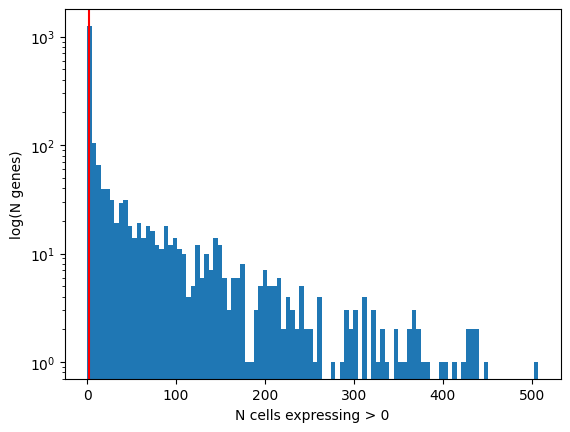

In [27]:
plt.hist(gene_qc_dataframe['n_cells_by_counts'], bins=100)
plt.xlabel('N cells expressing > 0')
plt.ylabel('log(N genes)') # for visual clarity
plt.axvline(2, color='red')
plt.yscale('log') 

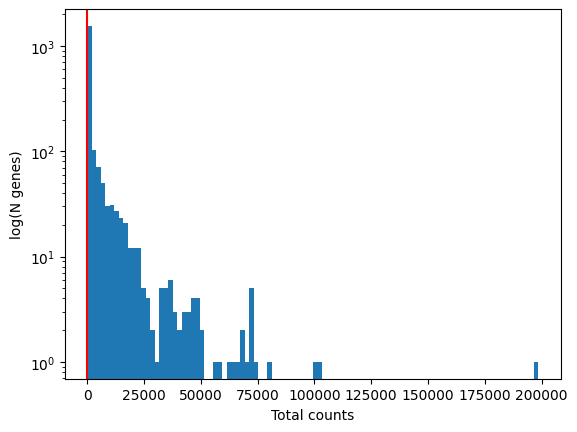

In [28]:
plt.hist(gene_qc_dataframe['total_counts'], bins=100)
plt.xlabel('Total counts')
plt.ylabel('log(N genes)') # for visual clarity
plt.yscale('log') 
plt.axvline(8, color='red')

Genes which are undetectable have been removed here and the genes have been considered to be detectable only when 2 cells contains more than 4 reads.

In [29]:
print('Started with: \n', adata)
sc.pp.filter_genes(adata, min_cells = 2)
sc.pp.filter_genes(adata, min_counts = 8)
print('Finished with: \n', adata)

Started with: 
 AnnData object with n_obs × n_vars = 544 × 2005
    obs: 'cell_ontology_class', 'subtissue', 'mouse.sex', 'mouse.id', 'plate.barcode', 'n_genes'
    var: 'ERCC'
Finished with: 
 AnnData object with n_obs × n_vars = 544 × 881
    obs: 'cell_ontology_class', 'subtissue', 'mouse.sex', 'mouse.id', 'plate.barcode', 'n_genes'
    var: 'ERCC', 'n_cells', 'n_counts'


C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\anndata\_core\anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\anndata\_core\anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


After quality control it can be seen that genes number have decreased from 2005 to 881.

In [30]:
# Saving the QC dataset
adata.write('skin_qc.h5ad')

Step 03- Principal Component Analysis before and after Normalization

In [31]:
# Loading the dataset
import scanpy as sc
adata = sc.read('skin_qc.h5ad')

C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\anndata\_core\anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [32]:
#Principal Component Anlaysis or PCA
?sc.pl.pca_overview

Signature: sc.pl.pca_overview(adata: 'AnnData', **params)
Docstring:
Plot PCA results.

The parameters are the ones of the scatter plot. Call pca_ranking separately
if you want to change the default settings.

Parameters
----------
adata : 'AnnData'
    Annotated data matrix.
color
    Keys for observation/cell annotation either as list `["ann1", "ann2"]` or
    string `"ann1,ann2,..."`.
use_raw
    Use `raw` attribute of `adata` if present.
sort_order
    For continuous annotations used as color parameter, plot data points
    with higher values on top of others.
groups
    Restrict to a few categories in categorical observation annotation.
    The default is not to restrict to any groups.
dimensions
    0-indexed dimensions of the embedding to plot as integers. E.g. [(0, 1), (1, 2)].
    Unlike `components`, this argument is used in the same way as `colors`, e.g. is
    used to specify a single plot at a time. Will eventually replace the components
    argument.
components
    For in

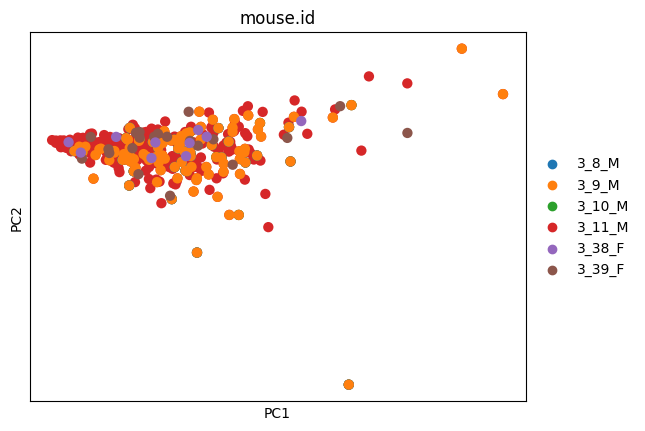

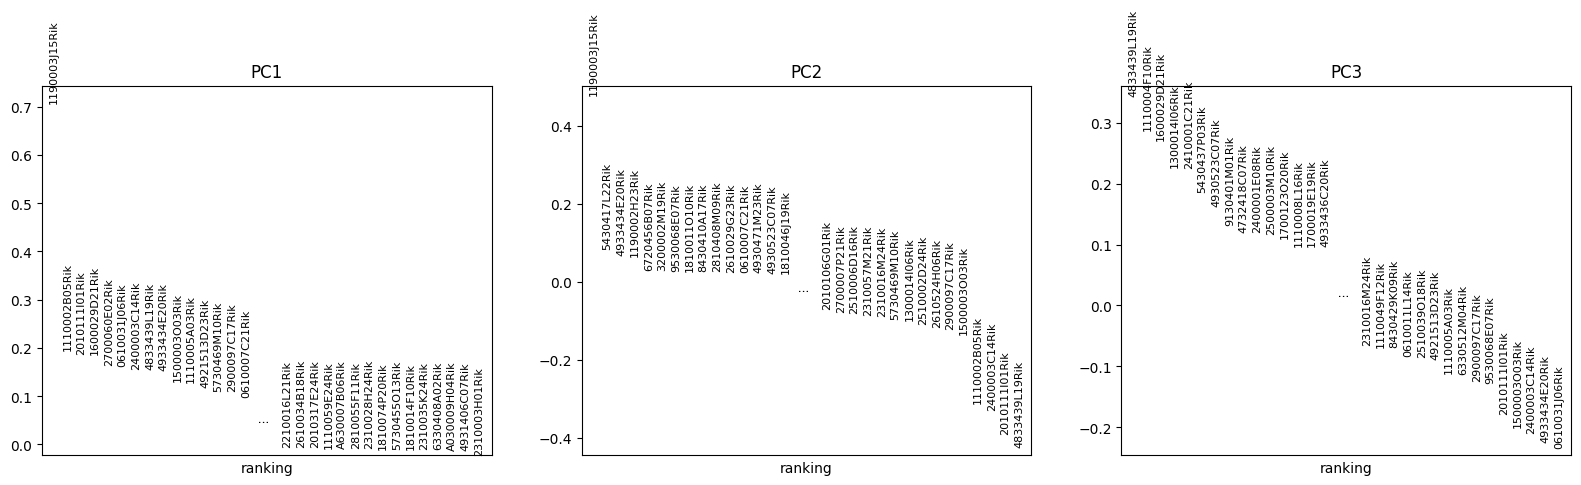

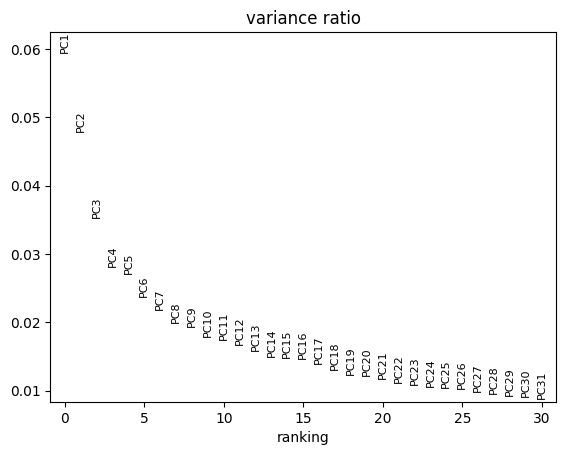

In [33]:
# PCA based on mouse.id
sc.pp.pca(adata)
sc.pl.pca_overview(adata, color='mouse.id')

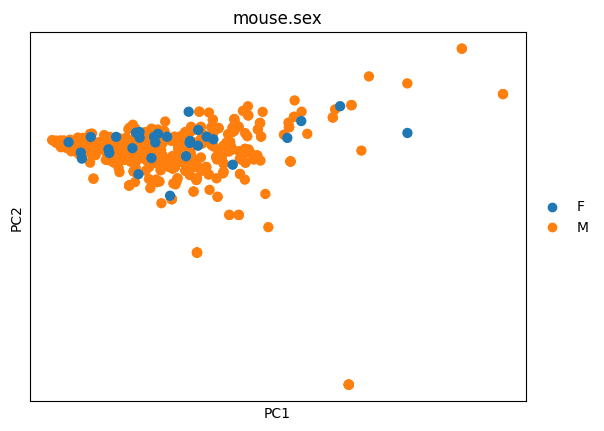

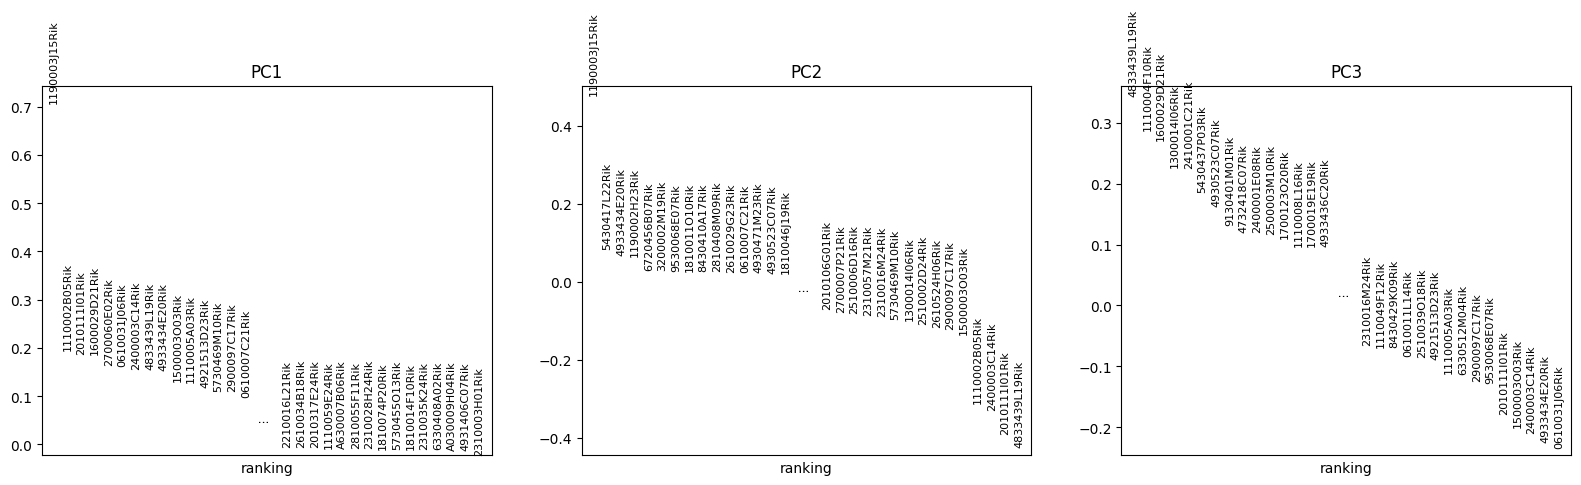

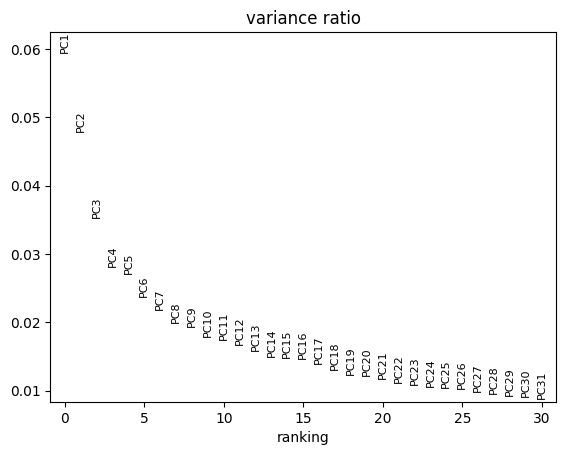

In [34]:
# PCA based on mouse.sex
sc.pp.pca(adata)
sc.pl.pca_overview(adata, color='mouse.sex')

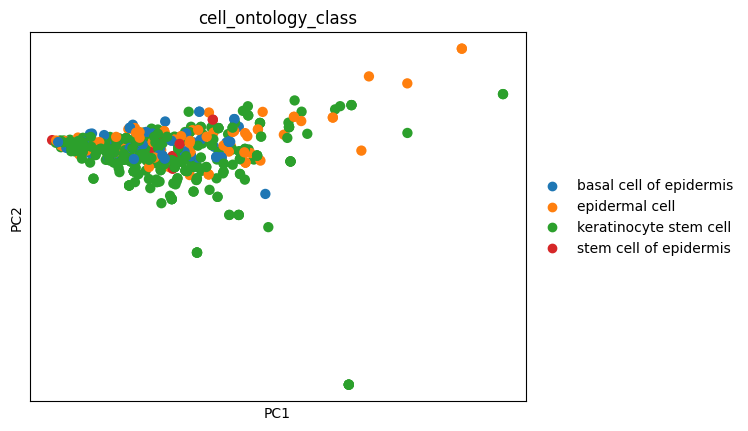

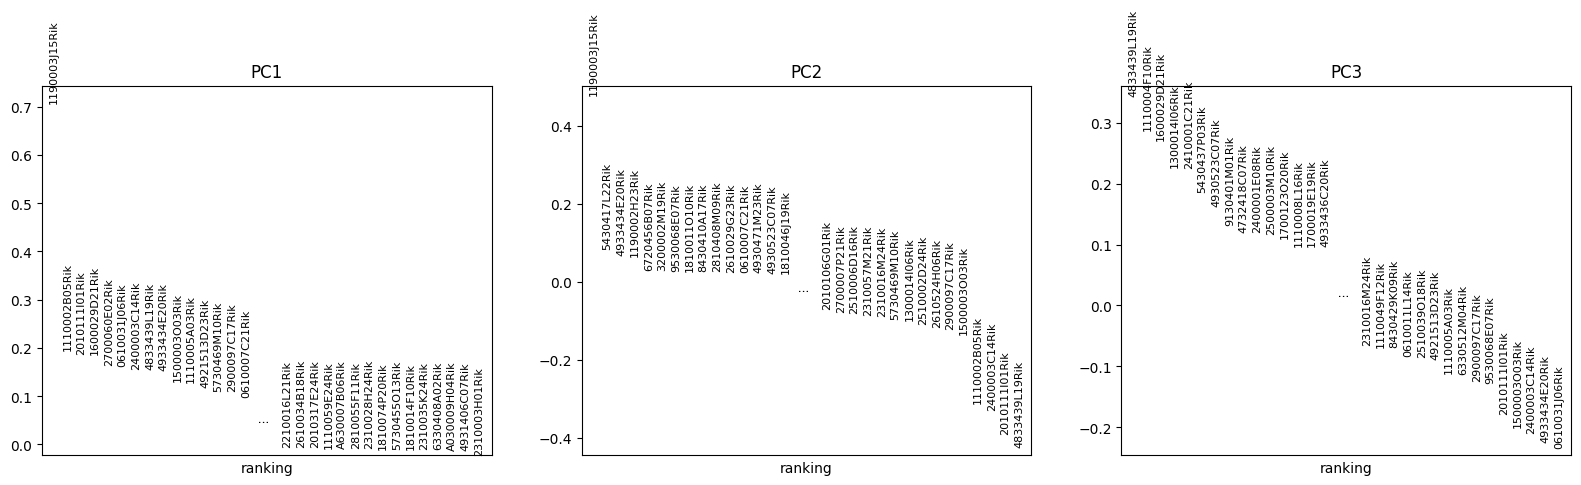

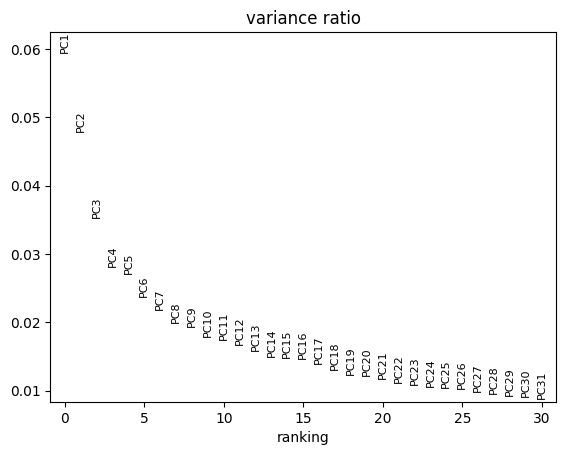

In [35]:
#PCA based on cell_ontology_class
sc.pp.pca(adata)
sc.pl.pca_overview(adata, color='cell_ontology_class')

From the above plots(first and third plot of every set of plot) it could be said that the first PC captures the most variattion though the others PC contributes as well.The second plot of every plot exhibit the loadings and the first PC is dominated by small number of genes while the 2nd and 3rd PC do not.

Normalizing cell library size using counts per million or CPM simple linear scaling so that every call has same libary size.


C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\anndata\_core\anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


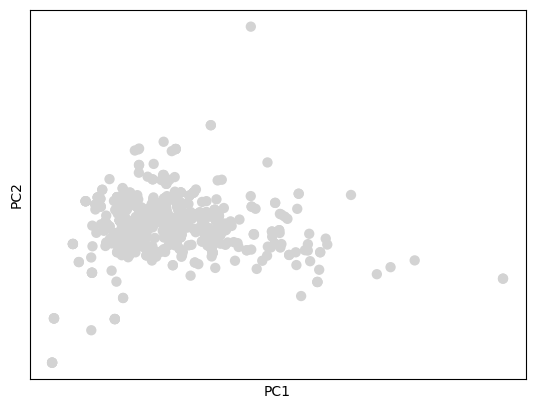

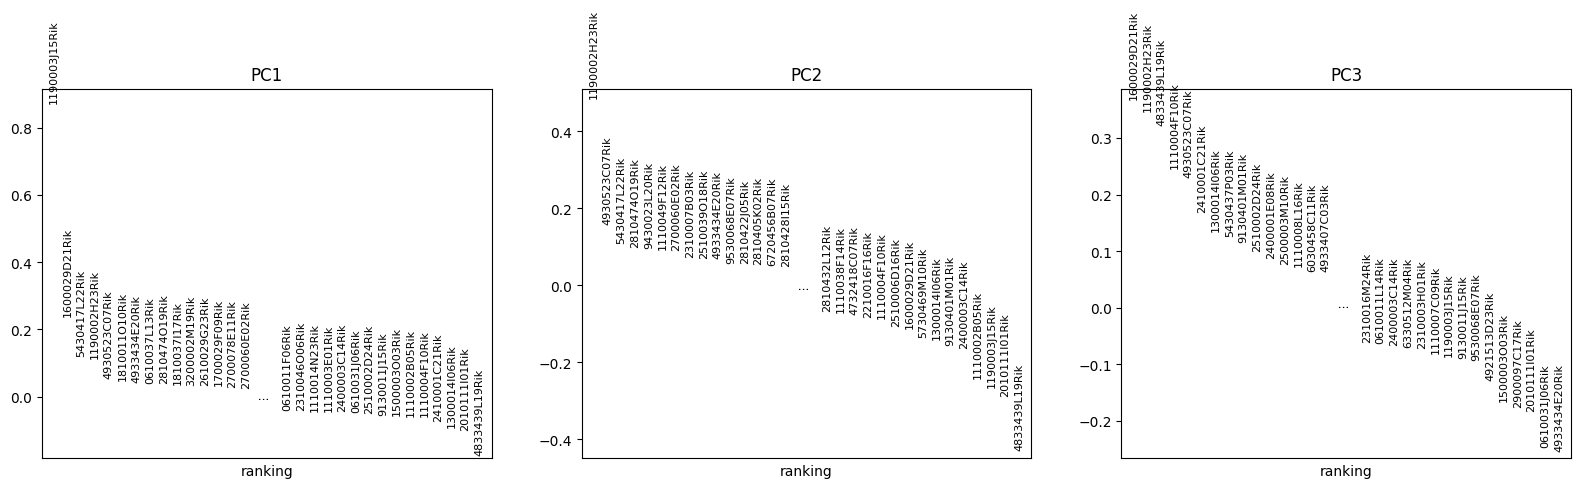

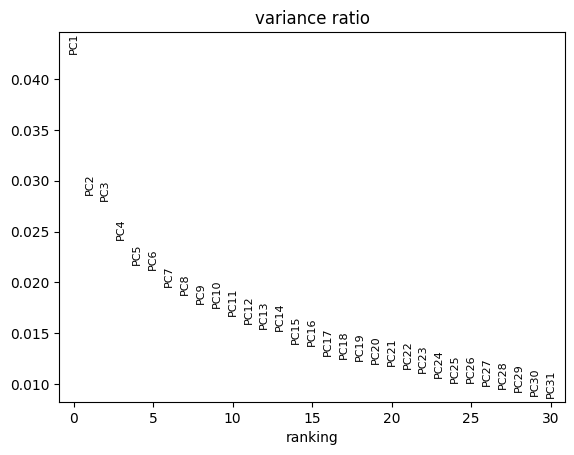

In [36]:
adata_cpm_ex = adata.copy() # making a copy so that the results can be compared later
sc.pp.normalize_total(adata_cpm_ex, target_sum=1e6, exclude_highly_expressed=False) # normalize
sc.pp.pca(adata_cpm_ex) # run pca
sc.pl.pca_overview(adata_cpm_ex) # plot pca

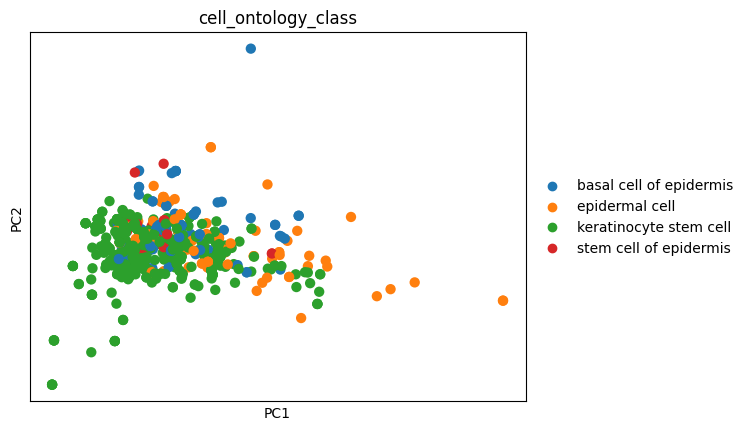

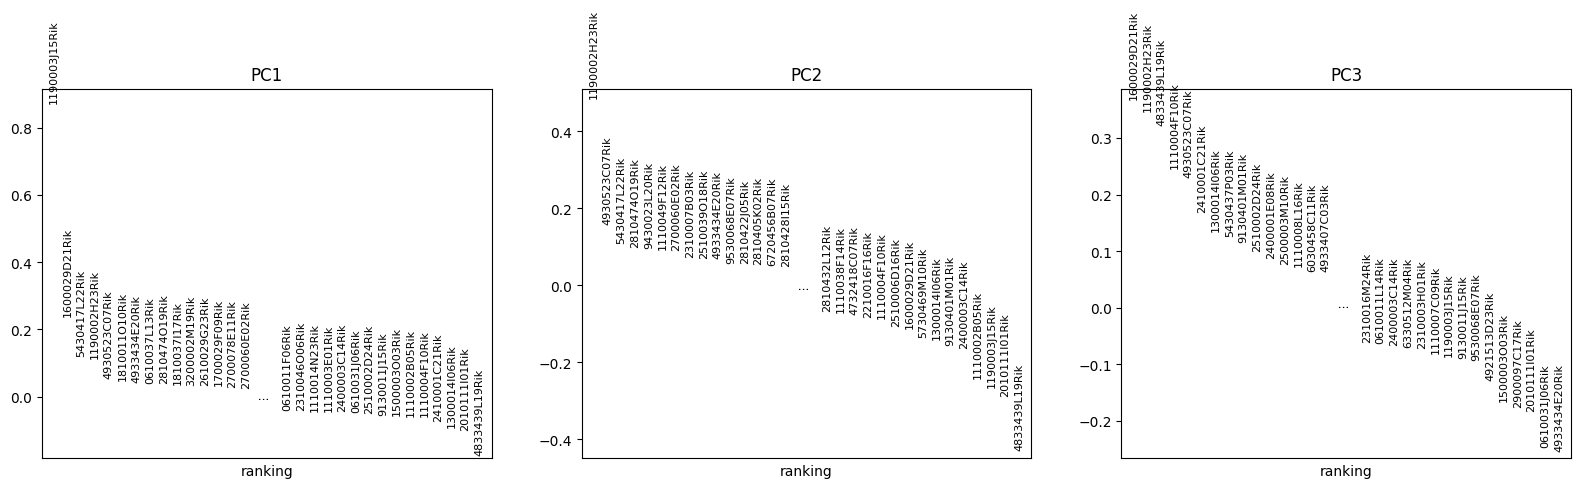

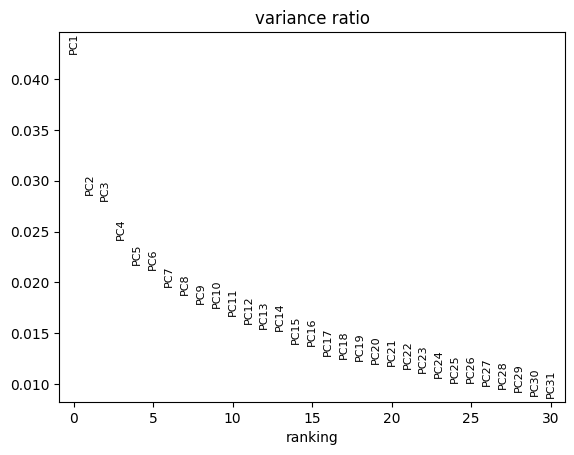

In [37]:
#PCA based on cell_ontology_class
sc.pp.pca(adata_cpm_ex)
sc.pl.pca_overview(adata_cpm_ex, color='cell_ontology_class')

After comparing this before normalizing library size it can be said that the first plot shows both PC captures variation now.From the second plot it can be said that second PC determined by lot of genes and more PC shows variation according to the third plot.

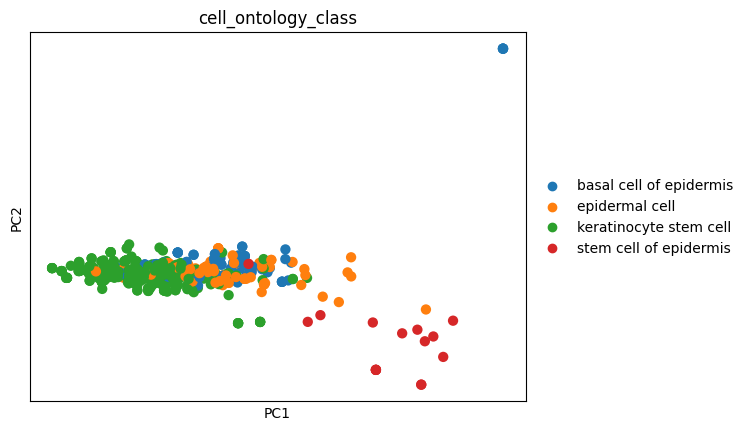

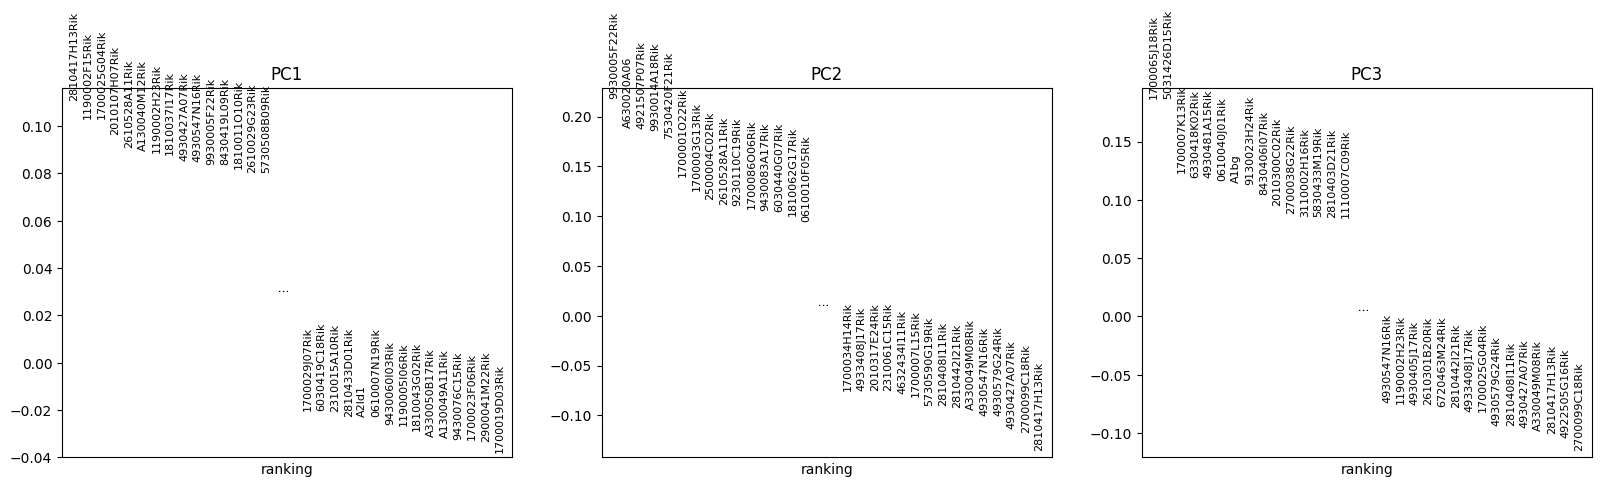

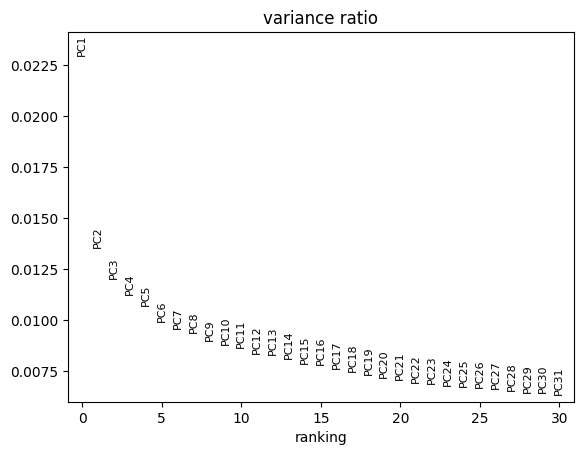

In [38]:
#Normalizing gene expression by centering and scaling the gene expression values
sc.pp.log1p(adata_cpm_ex)
sc.pp.scale(adata_cpm_ex)

sc.pp.pca(adata_cpm_ex)
sc.pl.pca_overview(adata_cpm_ex, color='cell_ontology_class')

It can be said that now PC1 and PC2 determined by various genes then before and the first plot similar to little bit of gaussian looking cells.

In [39]:
#Saving the file to use later
adata_cpm_ex.write('skin_normalized.h5ad')

STEP 04- Embedding using  tSNE(t-Distributed Stochastic Neighbour Embedding)  and UMAP (Uniform Approximation and Projection)

In [40]:
import scanpy as sc
adata = sc.read('skin_normalized.h5ad')# Reading the data

C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\anndata\_core\anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


#tSNE or (t-Distributed Stochastic Neighbor Embedding)to capture non-linear structure of data through preserving the local distances between cell

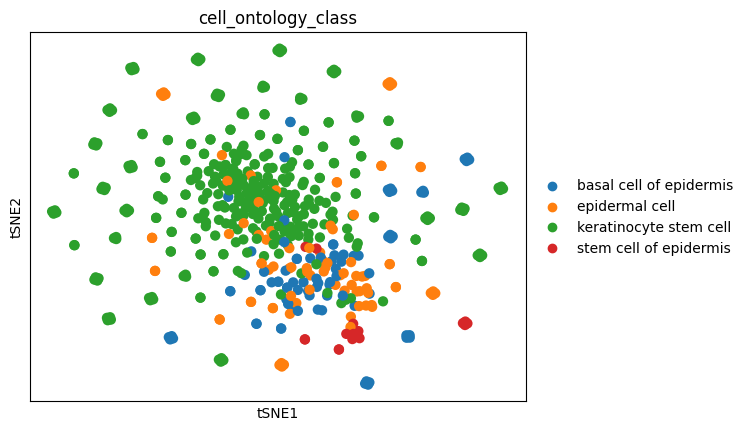

In [41]:
sc.tl.tsne(adata, perplexity=10, learning_rate=1000, random_state=0)

sc.pl.tsne(adata, color='cell_ontology_class')

In [42]:
help(sc.tl.tsne)
help(sc.pl.tsne)

Help on function tsne in module scanpy.tools._tsne:

tsne(adata: 'AnnData', n_pcs: 'int | None' = None, *, use_rep: 'str | None' = None, perplexity: 'float | int' = 30, early_exaggeration: 'float | int' = 12, learning_rate: 'float | int' = 1000, random_state: 'AnyRandom' = 0, use_fast_tsne: 'bool' = False, n_jobs: 'int | None' = None, copy: 'bool' = False, metric: 'str' = 'euclidean') -> 'AnnData | None'
    t-SNE :cite:p:`vanDerMaaten2008,Amir2013,Pedregosa2011`.

    t-distributed stochastic neighborhood embedding (tSNE, :cite:t:`vanDerMaaten2008`) has been
    proposed for visualizating single-cell data by :cite:t:`Amir2013`. Here, by default,
    we use the implementation of *scikit-learn* :cite:p:`Pedregosa2011`. You can achieve
    a huge speedup and better convergence if you install Multicore-tSNE_
    by :cite:t:`Ulyanov2016`, which will be automatically detected by Scanpy.

    .. _multicore-tsne: https://github.com/DmitryUlyanov/Multicore-TSNE

    Parameters
    ----------
 

It can be seen that the tSNE dpes moderate job in grouping similar cells.

UMAP (Uniform Approximation and Projection) a dimensionality reduction method which tries to preserve the local and global structure.

In [43]:
sc.pp.neighbors(adata) # UMAP is based on the neighbor graph
sc.tl.umap(adata, min_dist=0.3, spread=2.8, random_state=1, n_components=2)

C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


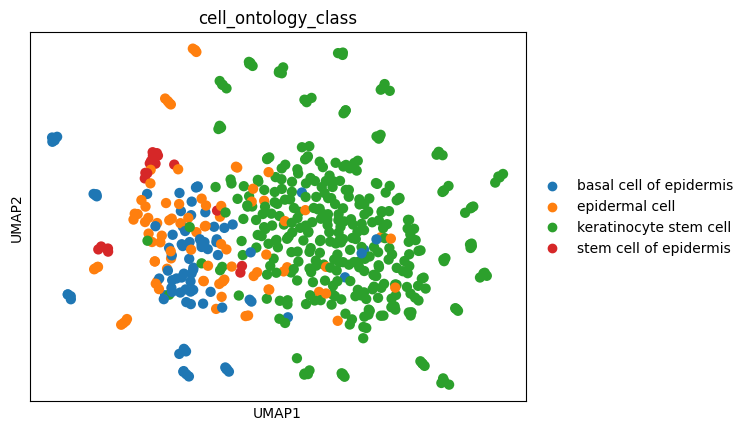

In [44]:
sc.pl.umap(adata, color='cell_ontology_class')

In [45]:
help(sc.tl.umap)


Help on function umap in module scanpy.tools._umap:

umap(adata: 'AnnData', *, min_dist: 'float' = 0.5, spread: 'float' = 1.0, n_components: 'int' = 2, maxiter: 'int | None' = None, alpha: 'float' = 1.0, gamma: 'float' = 1.0, negative_sample_rate: 'int' = 5, init_pos: '_InitPos | np.ndarray | None' = 'spectral', random_state: 'AnyRandom' = 0, a: 'float | None' = None, b: 'float | None' = None, copy: 'bool' = False, method: "Literal['umap', 'rapids']" = 'umap', neighbors_key: 'str | None' = None) -> 'AnnData | None'
    Embed the neighborhood graph using UMAP :cite:p:`McInnes2018`.

    UMAP (Uniform Manifold Approximation and Projection) is a manifold learning
    technique suitable for visualizing high-dimensional data. Besides tending to
    be faster than tSNE, it optimizes the embedding such that it best reflects
    the topology of the data, which we represent throughout Scanpy using a
    neighborhood graph. tSNE, by contrast, optimizes the distribution of
    nearest-neighbor di

It can be seen that the UMAP cluster similar cell together though only keratinocyte stem cells have been clustered seperayely from others. The reason could be lower number of cell.

In [46]:
# Saving the data
adata.write('skin_embeddings.h5ad')

Step 05-Clustering using K-means and graph based 

C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\anndata\_core\anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


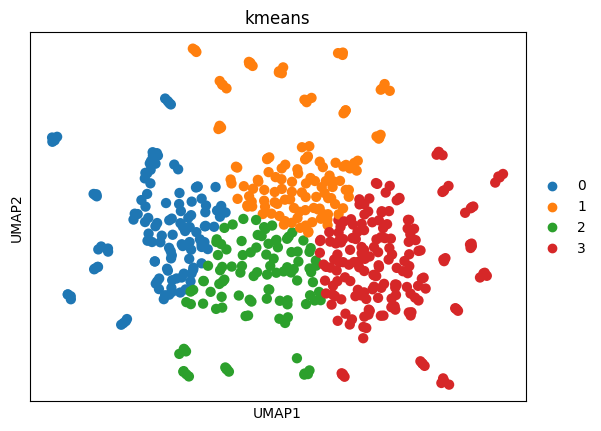

In [47]:
#k-means clustering or unsupervised clustering using umap coordinates
import scanpy as sc
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from matplotlib import pyplot as plt
%matplotlib inline

#read the data
adata = sc.read('skin_embeddings.h5ad')

umap_coordinates = adata.obsm['X_umap'] # extracting the UMAP coordinates for each cell
kmeans = KMeans(n_clusters=4, random_state=0).fit(umap_coordinates) # fixing the random state for reproducibility

adata.obs['kmeans'] = kmeans.labels_ # retrieving the labels and add them as a metadata column in our AnnData object
adata.obs['kmeans'] = adata.obs['kmeans'].astype(str)

sc.pl.umap(adata, color='kmeans') # plotting the results

In [48]:
#Evaluating clustering using the adjusted Rand index
rand_index = adjusted_rand_score(labels_true = adata.obs['cell_ontology_class'], labels_pred = adata.obs['kmeans'])
print('The Rand index is', round(rand_index, 2))

The Rand index is 0.24


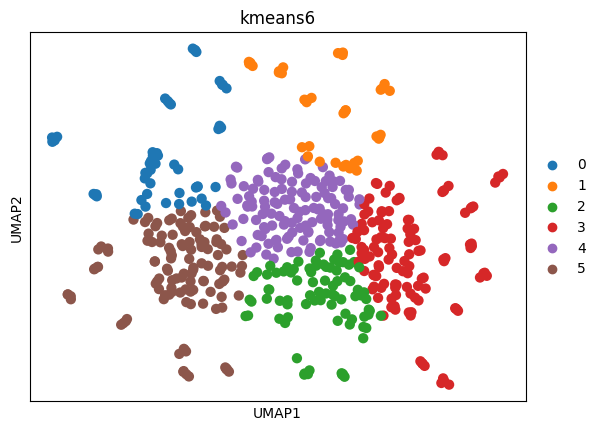

In [49]:
# Clustering again using different cluster number
umap_coordinates = adata.obsm['X_umap'] # extracting the UMAP coordinates for each cell
kmeans6 = KMeans(n_clusters=6, random_state=0).fit(umap_coordinates) # fixing the random state for reproducibility

adata.obs['kmeans6'] = kmeans6.labels_ # retrieving the labels and add them as a metadata column in our AnnData object
adata.obs['kmeans6'] = adata.obs['kmeans6'].astype(str)

sc.pl.umap(adata, color='kmeans6') # plotting the results

In [50]:
#Evaluating clustering using the adjusted Rand index
rand_index6 = adjusted_rand_score(labels_true = adata.obs['cell_ontology_class'], labels_pred = adata.obs['kmeans6'])
print('The Rand index is', round(rand_index6, 2))

The Rand index is 0.17


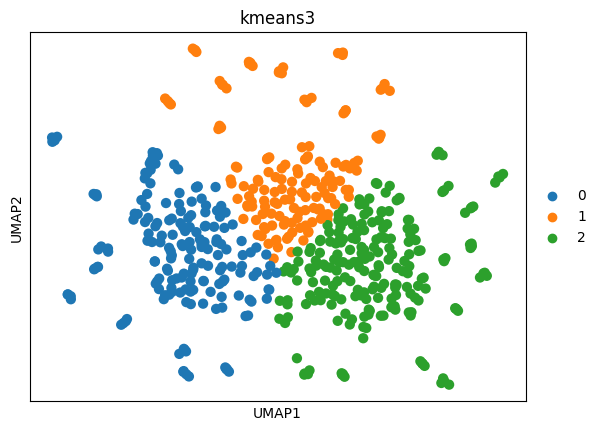

In [51]:
# Clustering again using different cluster number
umap_coordinates = adata.obsm['X_umap'] # extracting the UMAP coordinates for each cell
kmeans3 = KMeans(n_clusters=3, random_state=0).fit(umap_coordinates) # fixing the random state for reproducibility

adata.obs['kmeans3'] = kmeans3.labels_ # retrieving the labels and add them as a metadata column in our AnnData object
adata.obs['kmeans3'] = adata.obs['kmeans3'].astype(str)

sc.pl.umap(adata, color='kmeans3') # plotting the results

In [52]:
#Evaluating clustering using the adjusted Rand index
rand_index3 = adjusted_rand_score(labels_true = adata.obs['cell_ontology_class'], labels_pred = adata.obs['kmeans3'])
print('The Rand index is', round(rand_index3, 2))

The Rand index is 0.31


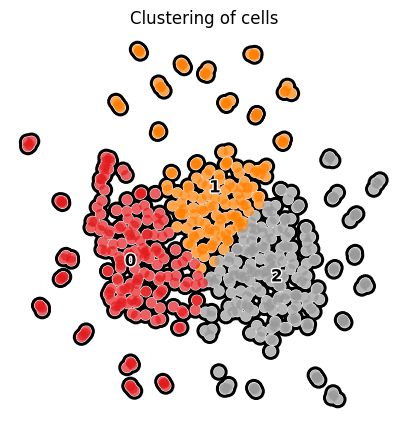

In [84]:
#Here visualizing the cluster again using scatterplot. This step was during the last step however was added later in this step.

from matplotlib.pyplot import rc_context
with rc_context({"figure.figsize": (5, 5)}):
    sc.pl.umap(
        adata,
        color="kmeans3",
        add_outline=True,
        legend_loc="on data",
        legend_fontsize=12,
        legend_fontoutline=2,
        frameon=False,
        title="Clustering of cells",
        palette="Set1",
    )

It could be that the cells can be clustered into three groups since the rand index number for three group is high among all. However, the rand index is still too low and the reason could be that lower number of cells.

In [85]:
print(adata)

AnnData object with n_obs × n_vars = 544 × 881
    obs: 'cell_ontology_class', 'subtissue', 'mouse.sex', 'mouse.id', 'plate.barcode', 'n_genes', 'kmeans', 'kmeans6', 'kmeans3', 'leiden'
    var: 'ERCC', 'n_cells', 'n_counts', 'mean', 'std'
    uns: 'cell_ontology_class_colors', 'log1p', 'mouse.id_colors', 'mouse.sex_colors', 'neighbors', 'pca', 'tsne', 'umap', 'kmeans_colors', 'kmeans6_colors', 'kmeans3_colors', 'leiden', 'leiden_colors'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'


In [54]:
help(sc.pp.neighbors)
help(sc.tl.umap)

Help on function neighbors in module scanpy.neighbors:

neighbors(adata: 'AnnData', n_neighbors: 'int' = 15, n_pcs: 'int | None' = None, *, use_rep: 'str | None' = None, knn: 'bool' = True, method: '_Method' = 'umap', transformer: 'KnnTransformerLike | _KnownTransformer | None' = None, metric: '_Metric | _MetricFn' = 'euclidean', metric_kwds: 'Mapping[str, Any]' = mappingproxy({}), random_state: 'AnyRandom' = 0, key_added: 'str | None' = None, copy: 'bool' = False) -> 'AnnData | None'
    Computes the nearest neighbors distance matrix and a neighborhood graph of observations :cite:p:`McInnes2018`.

    The neighbor search efficiency of this heavily relies on UMAP :cite:p:`McInnes2018`,
    which also provides a method for estimating connectivities of data points -
    the connectivity of the manifold (`method=='umap'`). If `method=='gauss'`,
    connectivities are computed according to :cite:t:`Coifman2005`, in the adaption of
    :cite:t:`Haghverdi2016`.

    Parameters
    ----------

In [ ]:
#Graph-based methods- installing igraph

%pip install python-igraph

In [60]:
#Graph-based methods

%pip install louvain

  Using cached louvain-0.8.2.tar.gz (4.2 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Failed to build louvain
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  exit code: 1
  
  [29 lines of output]
  C:\Users\USER\AppData\Local\Temp\pip-build-env-53pn9g3v\overlay\Lib\site-packages\setuptools\_distutils\dist.py:268: UserWarning: Unknown distribution option: 'test_suite'
    warnings.warn(msg)
  WARNING setuptools_scm.pyproject_reading toml section missing 'pyproject.toml does not contain a tool.setuptools_scm section'
  Traceback (most recent call last):
    File "C:\Users\USER\AppData\Local\Temp\pip-build-env-53pn9g3v\normal\Lib\site-packages\setuptools_scm\_integration\pyproject_reading.py", line 36, in read_pyproject
      section = defn.get("tool", {})[tool_name]
                ~~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^
  KeyError: 'setuptools_scm'
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpython-312
  creating build\lib.win-amd64-cpython-312\louvain
  copying src\louvain\functions.py -> build\lib.win-amd64-cpython-312\louvain
  copying src\lo

In [62]:
#Graph-based methods- installin newer version of louvein
pip install scanpy[leiden]

  Using cached leidenalg-0.10.2-cp38-abi3-win_amd64.whl.metadata (10 kB)
Using cached leidenalg-0.10.2-cp38-abi3-win_amd64.whl (1.6 MB)
Note: you may need to restart the kernel to use updated packages.


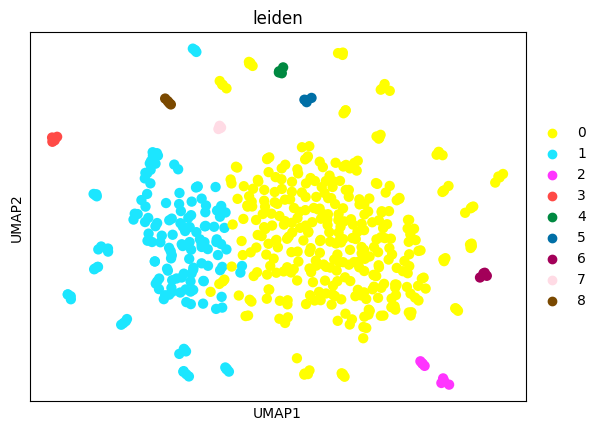

The rand index is  0.54


In [79]:
#Graph-based methods  using louvain algorithm and then calculating the adjusted rand score. The reason for calculating the adjusted rand score to decide which clustering methhod to choose.
sc.tl.leiden(adata, resolution=0.30)
sc.pl.umap(adata, color='leiden')
rand_index = adjusted_rand_score(adata.obs['cell_ontology_class'], adata.obs['leiden'])
print('The rand index is ', round(rand_index, 2))

From the clustering method, the graph-based method is preferred for it's higher adjusted rand score. It can be seen the above plot that the clustered cells are more visible than using the k means clustering.

In [80]:
#Saving to a cluster file
adata.write('skin_clusters.h5ad')

STEP 06- Visualization of genes and Differential gene expression

Visualization of gene expression and other variables

In [ ]:
#Visualize marker genes using heatmap
sc.pl.rank_genes_groups_heatmap(
    adata,
    n_genes=3,
    use_raw=False,
    swap_axes=True,
    vmin=-3,
    vmax=3,
    cmap="bwr",
    figsize=(10, 7),
    show=False,
);

In [81]:
#importing necessery libraries 
import scanpy as sc
from matplotlib.pyplot import rc_context

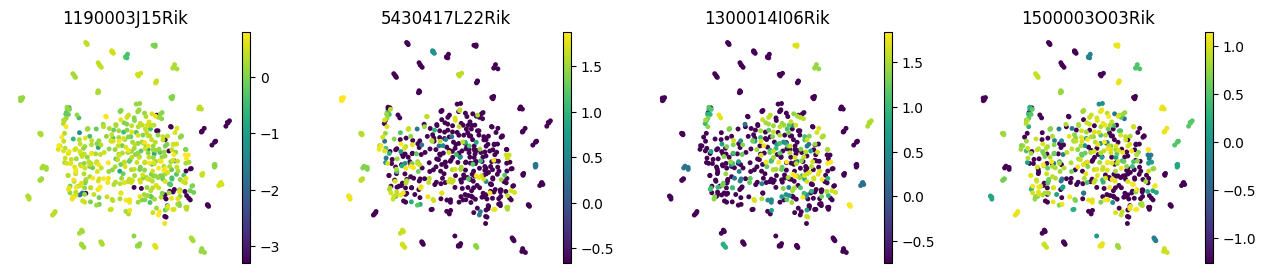

In [82]:
#Exploring four genes which have been chosen from visualizing the PC. First two are highly expressed and the last two are not that highly expressed compared the first two.
color_vars = [
    "1190003J15Rik",
    "5430417L22Rik",
    "1300014I06Rik",
    "1500003O03Rik",
]
with rc_context({"figure.figsize": (3, 3)}):
    sc.pl.umap(adata, color=color_vars, s=50, frameon=False, ncols=4, vmax="p99")

Identification of clusters based on known marker genes

Working with the whole dataset 

Differential Gene Expression- Finding marker genes using T- test

C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:461: RuntimeWarning: invalid 

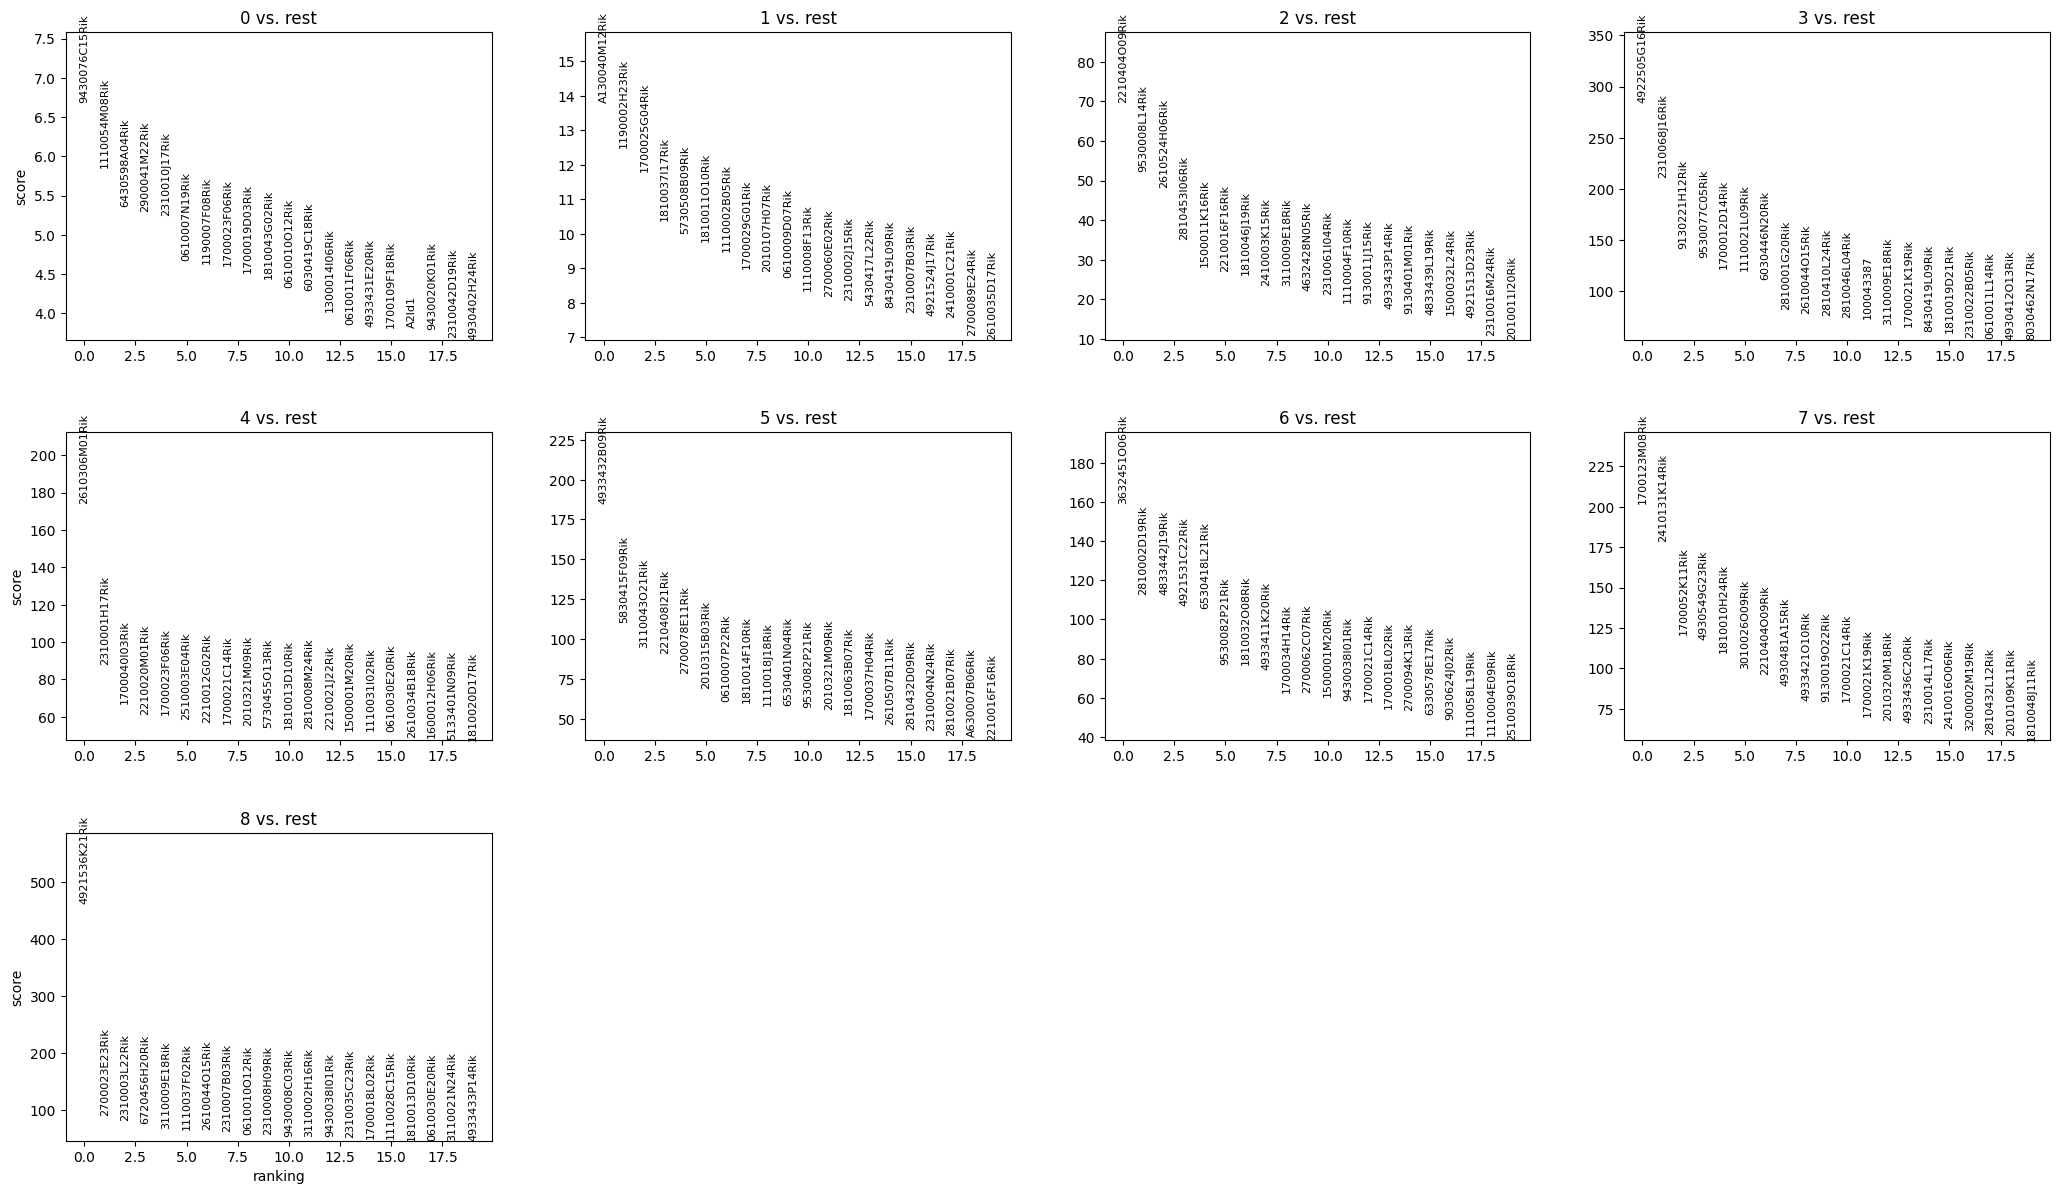

In [97]:
sc.tl.rank_genes_groups(adata, "leiden", method="t-test")
sc.pl.rank_genes_groups(adata, n_genes=20, sharey=False)

Differential Gene Expression- Finding marker genes using Wilcoxon Test

C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:461: RuntimeWarning: invalid 

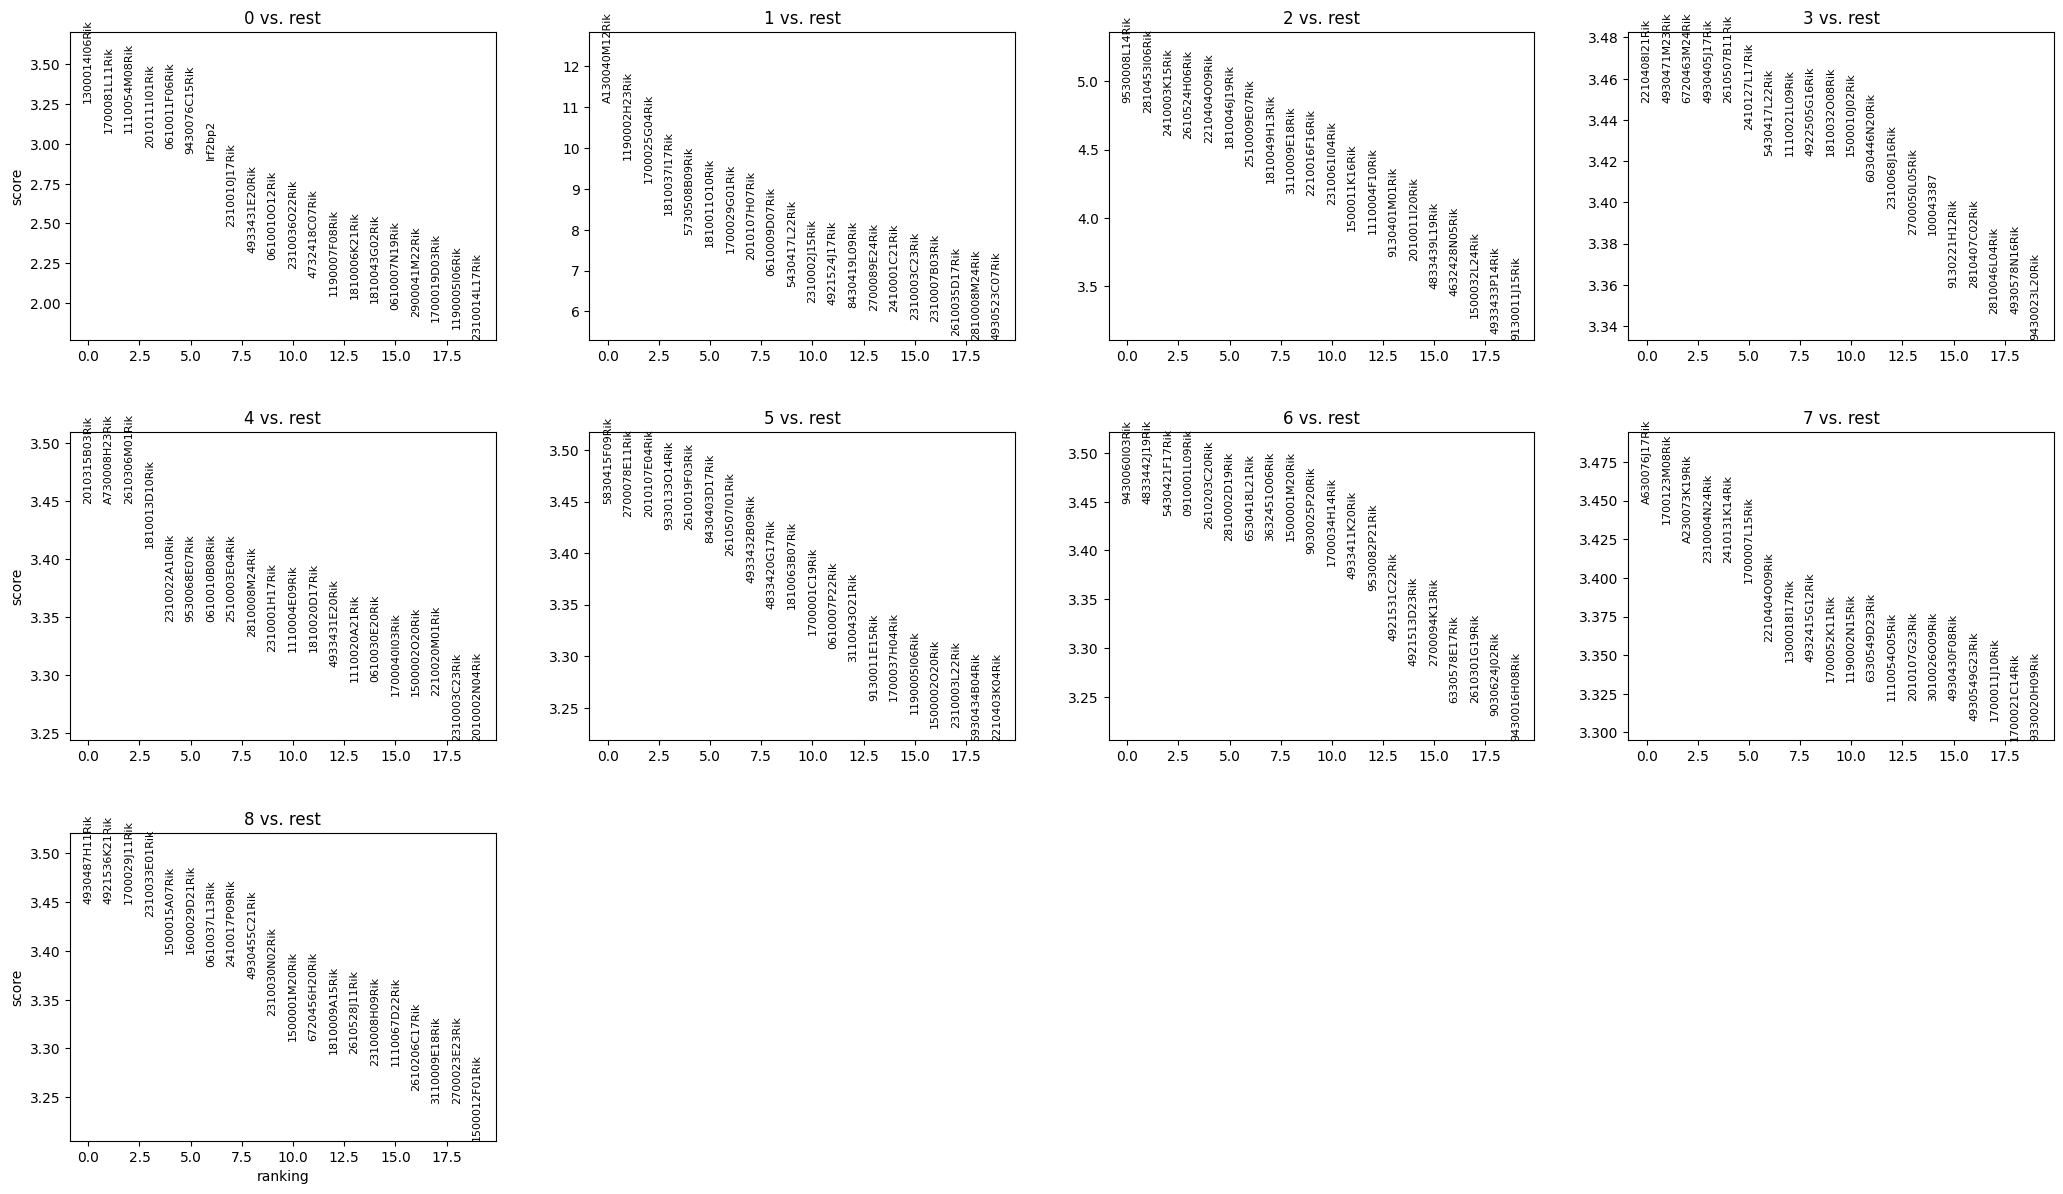

In [98]:
sc.tl.rank_genes_groups(adata, "leiden", method="wilcoxon")
sc.pl.rank_genes_groups(adata, n_genes=20, sharey=False)

Top marker genes found by both tests

In [99]:
pd.DataFrame(adata.uns["rank_genes_groups"]["names"]).head(5)

0              1              2              3              4  \
0  1300014I06Rik  A130040M12Rik  9530008L14Rik  2210408I21Rik  2010315B03Rik   
1  1700081L11Rik  1190002H23Rik  2810453I06Rik  4930471M23Rik  A730008H23Rik   
2  1110054M08Rik  1700025G04Rik  2410003K15Rik  6720463M24Rik  2610306M01Rik   
3  2010111I01Rik  1810037I17Rik  2610524H06Rik  4930405J17Rik  1810013D10Rik   
4  0610011F06Rik  5730508B09Rik  2210404O09Rik  2610507B11Rik  2310022A10Rik   

               5              6              7              8  
0  5830415F09Rik  9430060I03Rik  A630076J17Rik  4930487H11Rik  
1  2700078E11Rik  4833442J19Rik  1700123M08Rik  4921536K21Rik  
2  2010107E04Rik  5430421F17Rik  A230073K19Rik  1700029J11Rik  
3  9330133O14Rik  0910001L09Rik  2310004N24Rik  2310033E01Rik  
4  2610019F03Rik  2610203C20Rik  2410131K14Rik  1500015A07Rik

In [100]:
# A table with score and groups
Result = adata.uns["rank_genes_groups"]
groups = Result["names"].dtype.names
pd.DataFrame(
    {
        group + "_" + key[:1]: Result[key][group]
        for group in groups
        for key in ["names", "pvals"]
    }
).head(5)


0_n       0_p            1_n           1_p            2_n  \
0  1300014I06Rik  0.001124  A130040M12Rik  1.323171e-28  9530008L14Rik   
1  1700081L11Rik  0.002128  1190002H23Rik  3.000877e-22  2810453I06Rik   
2  1110054M08Rik  0.002134  1700025G04Rik  5.341197e-20  2410003K15Rik   
3  2010111I01Rik  0.002891  1810037I17Rik  5.910358e-17  2610524H06Rik   
4  0610011F06Rik  0.003001  5730508B09Rik  3.018204e-15  2210404O09Rik   

        2_p            3_n       3_p            4_n       4_p            5_n  \
0  0.000001  2210408I21Rik  0.000564  2010315B03Rik  0.000564  5830415F09Rik   
1  0.000002  4930471M23Rik  0.000564  A730008H23Rik  0.000564  2700078E11Rik   
2  0.000004  6720463M24Rik  0.000564  2610306M01Rik  0.000564  2010107E04Rik   
3  0.000005  4930405J17Rik  0.000564  1810013D10Rik  0.000650  9330133O14Rik   
4  0.000005  2610507B11Rik  0.000564  2310022A10Rik  0.000820  2610019F03Rik   

        5_p            6_n       6_p            7_n       7_p            8_n  \
0  0.000564  9430060I03Rik  0.000564  A630076J17Rik  0.000564  4930487H11Rik   
1  0.000592  4833442J19Rik  0.000564  1700123M08Rik  0.000592  4921536K21Rik   
2  0.000592  5430421F17Rik  0.000592  A230073K19Rik  0.000620  1700029J11Rik   
3  0.000620  0910001L09Rik  0.000592  2310004N24Rik  0.000650  2310033E01Rik   
4  0.000620  2610203C20Rik  0.000620  2410131K14Rik  0.000650  1500015A07Rik   

        8_p  
0  0.000564  
1  0.000564  
2  0.000564  
3  0.000592  
4  0.000681

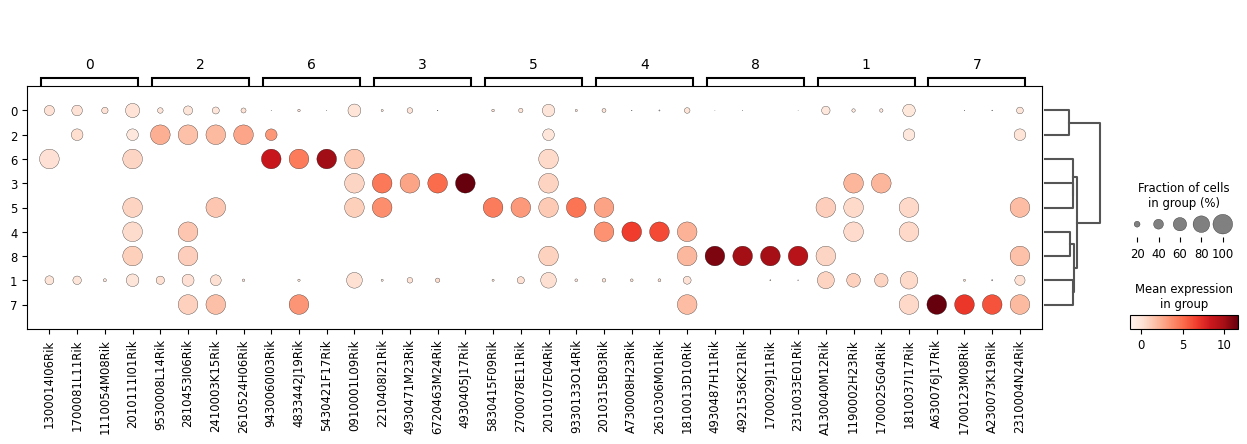

In [104]:
#Differentially expressed genes visualization using the dotplot
sc.pl.rank_genes_groups_dotplot(adata, n_genes=4)

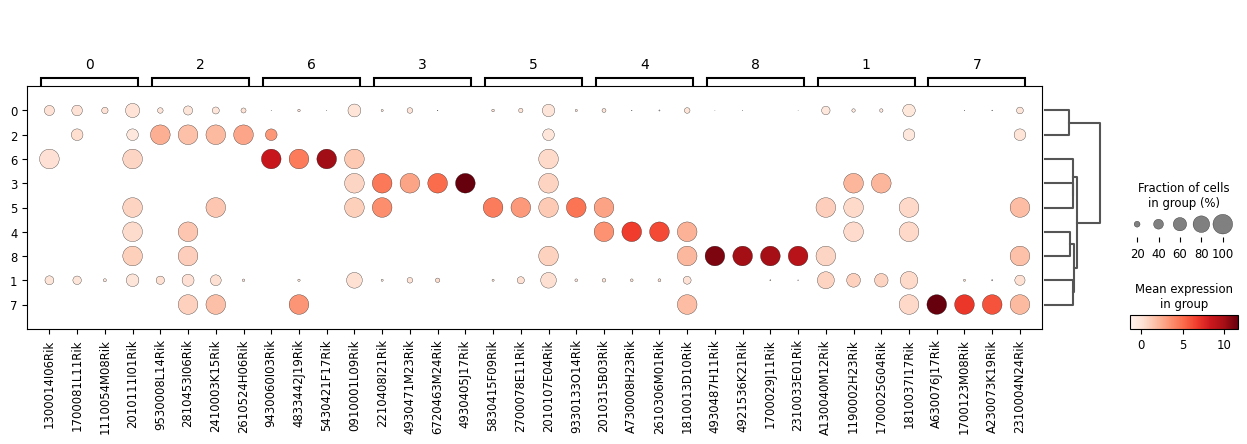

In [116]:
#Differentially expressed genes visualization using the dotplot
# Same plot as above using the groupby method
sc.pl.rank_genes_groups_dotplot(adata, groupby='leiden',n_genes=4)

It can be seen from the dotplot that cluster 3,6,7 and 8 have the most highly expressed gene. Some of the genes that are highly expressed are 4930487H11Rik,4921536K21Rik,1700029I15Rik,2310033E01Rik,A630076J17Rik and 5430421F17Rik and according to the mouse genome informatics they are mostly protein coding gene.2310033E01Rik is an inhibitor and found in the extracelluar region whereas the 1700029I15Rik is the regulator of sperm-oocyte fusion and found in endoplasmic reticulum.

From the above plot it can be seen that most of the highly expressed genes are in the cluster 8 which refers that they are for cell regulation.

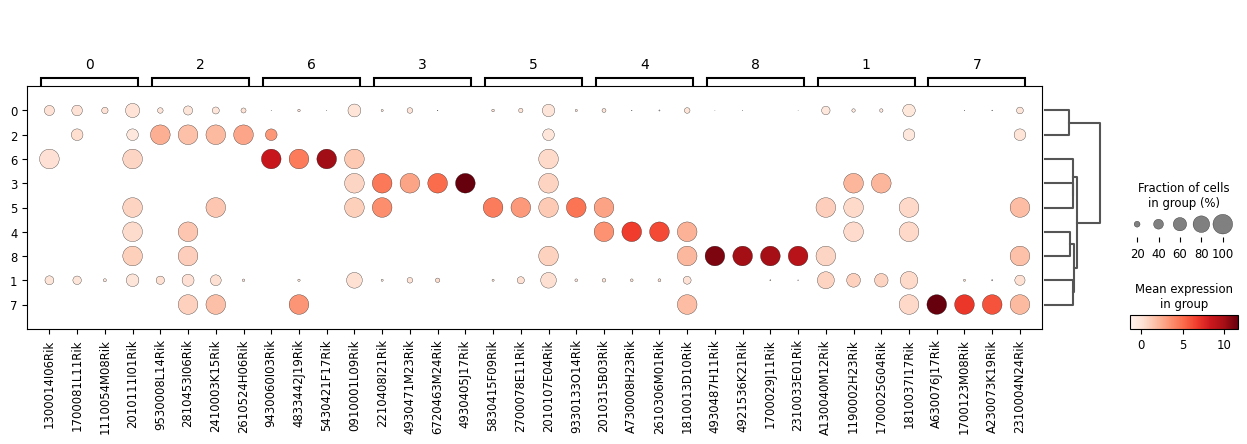

In [121]:
#Differentially expressed genes visualization using the dotplot 
# Same plot as above using the groupby method
sc.pl.rank_genes_groups_dotplot(adata, groupby='leiden',n_genes=4)

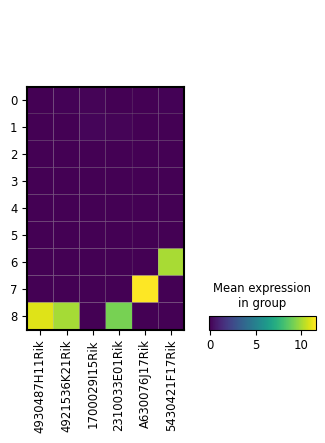

In [124]:
# Visualizing only the chosen highly expressed genes using matrix plot.
with rc_context({"figure.figsize": (4.5, 3)}):
    sc.pl.matrixplot(adata, ["4930487H11Rik","4921536K21Rik","1700029I15Rik","2310033E01Rik","A630076J17Rik","5430421F17Rik"], groupby="leiden")

As expected, the matrixplot shows that the cluster 8 has a lot of highly expressed genes.

categories: basal cell of epidermis, epidermal cell, keratinocyte stem cell, etc.
var_group_labels: 0, 1, 2, etc.


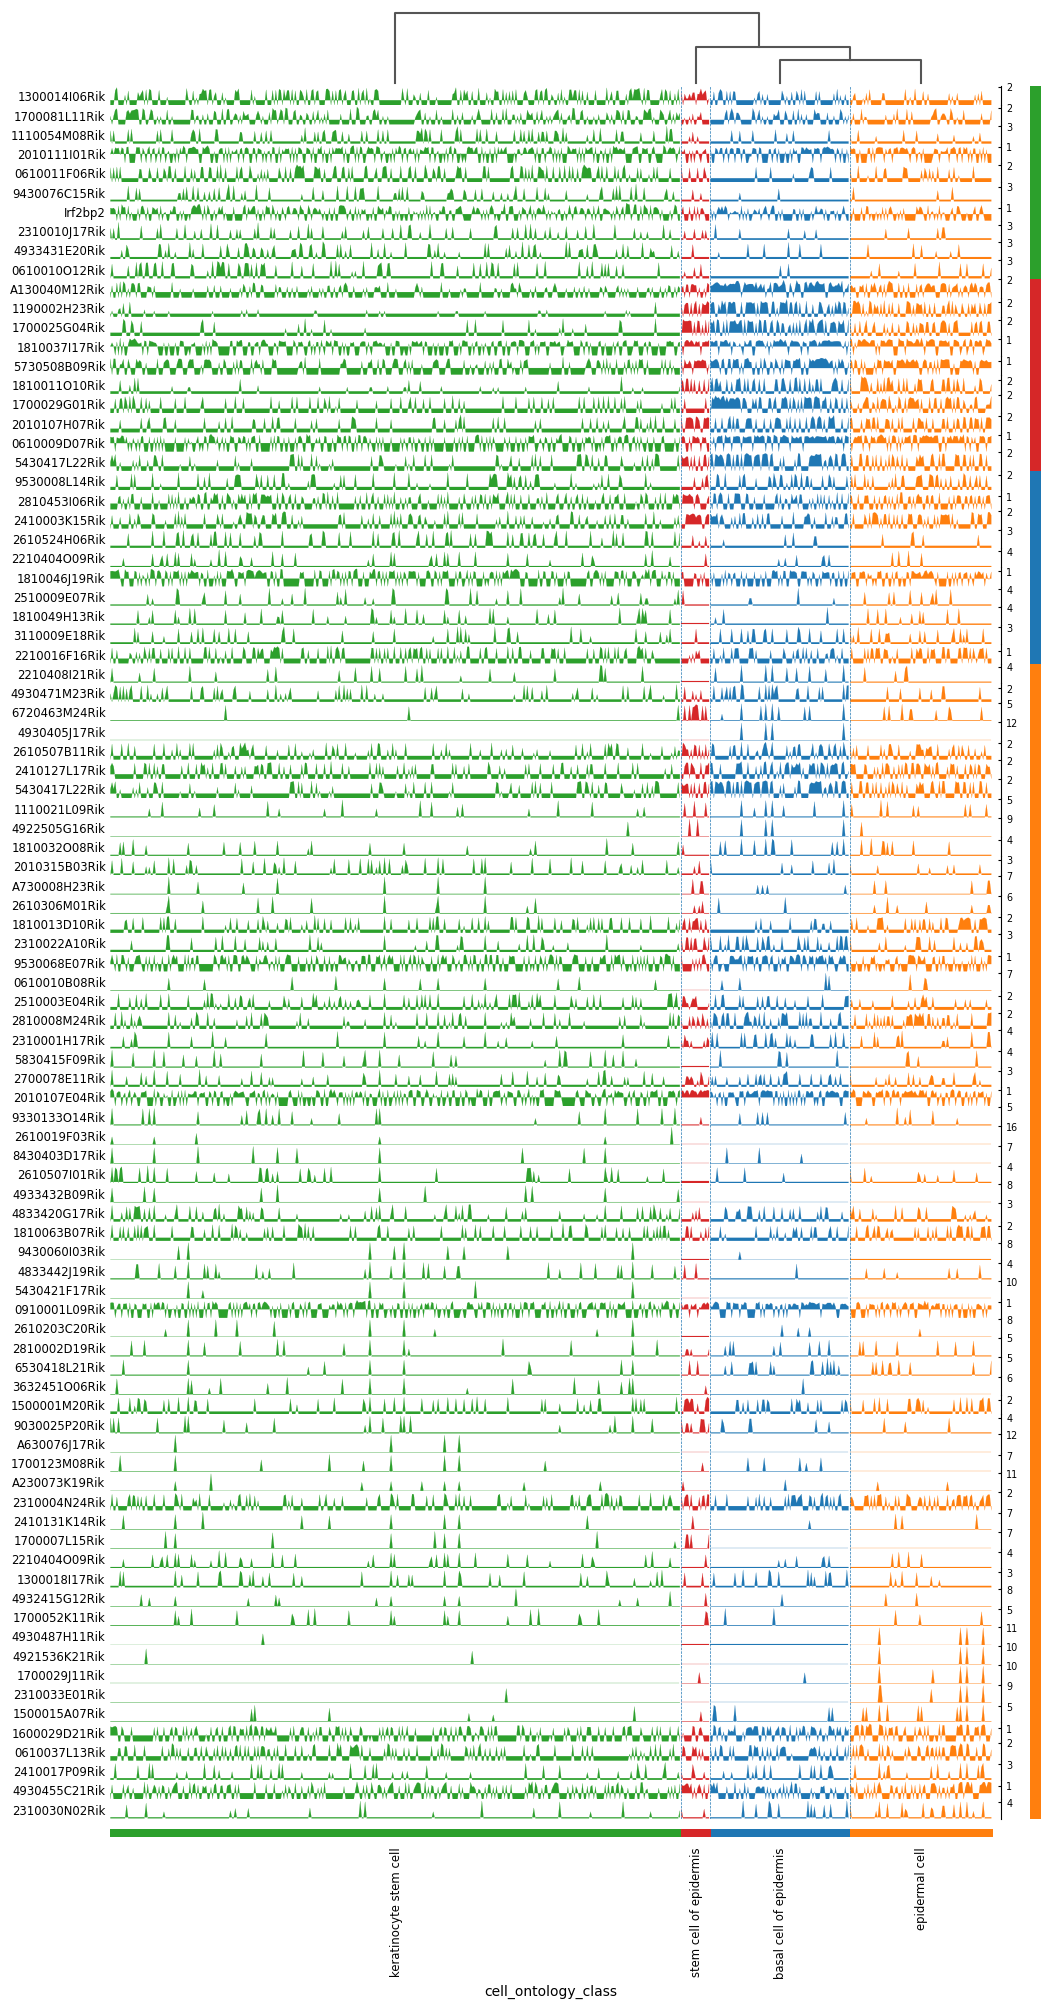

In [102]:
sc.pl.rank_genes_groups_tracksplot(adata, groupby='cell_ontology_class') # plot the result

From the above plot it can be seen that most genes are expressed in firstly keratinocyte stem cell and secondly epidermal cell.

References:

1. Tang, F., Barbacioru, C., Wang, Y. et al. mRNA-Seq whole-transcriptome analysis of a single cell. Nat Methods 6, 377–382 (2009). https://doi.org/10.1038/nmeth.1315 
2. The Tabula Muris Consortium., Overall coordination., Logistical coordination. et al. Single-cell transcriptomics of 20 mouse organs creates a Tabula Muris. Nature 562, 367–372 (2018). https://doi.org/10.1038/s41586-018-0590-4
3. Wolf, F., Angerer, P. & Theis, F. SCANPY: large-scale single-cell gene expression data analysis. Genome Biol 19, 15 (2018). https://doi.org/10.1186/s13059-017-1382-0
